In [1]:
import pandas as pd

**Read Data**

In [12]:
df = pd.read_csv('waterquality_ammonia.csv')

In [13]:
df.head()

,SAMPLE_DATE,DETERMINAND_LABEL,RESULT
0,04-01-2000,Ammonia(N),10.40
1,04-01-2000,Ammonia(N),6.22
2,10-01-2000,Ammonia(N),3.58
3,24-01-2000,Ammonia(N),34.80
4,24-01-2000,Ammonia(N),0.03


In [15]:
#Changing the datatype of sample_date
df['SAMPLE_DATE']= pd.to_datetime(df['SAMPLE_DATE'])

In [19]:
#Using the resample method on the time series column to get mean of month wise data 
df = df.resample(rule='M', on='SAMPLE_DATE')['RESULT'].mean()

In [20]:
df.head()

SAMPLE_DATE
2000-01-31    8.722500
2000-02-29    0.036000
2000-03-31    0.081400
2000-04-30    5.706667
2000-05-31    0.037750
Freq: M, Name: RESULT, dtype: float64

In [26]:
df1 = pd.DataFrame(df)

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 204 entries, 2000-01-31 to 2016-12-31
Freq: M
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RESULT  192 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [37]:
#Checking for null values
df1['RESULT'].isnull().sum()


12

In [40]:
#Filling the null values with 0 as no data was collected for those months
df1['RESULT'] = df1['RESULT'].fillna(0)

**Plotting the Data**

<AxesSubplot:xlabel='SAMPLE_DATE'>

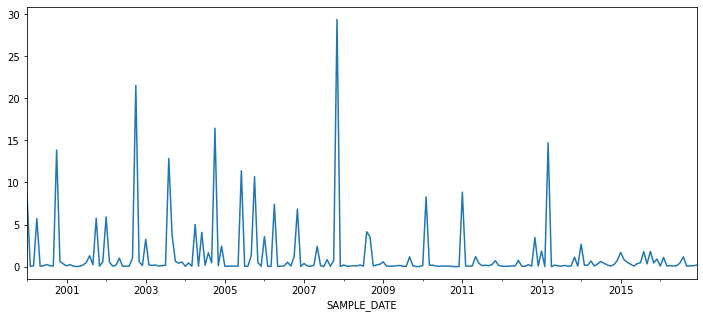

In [41]:
df1['RESULT'].plot(figsize=(12,5))

**Checking For Stationarity**

In [42]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [43]:
adf_test(df1['RESULT'])

1. ADF :  -15.225333276311975
2. P-Value :  5.413803172682968e-28
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 203
5. Critical Values :
	 1% :  -3.462980134086401
	 5% :  -2.875885461947131
	 10% :  -2.5744164898444515


In [44]:
!pip install pmdarima
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

**Figuring Out the Order for ARIMA Model**

In [56]:
stepwise_fit = auto_arima(df1['RESULT'], trace = True,
                          suppress_warnings=True)           

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1252.440, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1196.976, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1250.453, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1171.688, Time=0.06 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1158.117, Time=0.10 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1155.838, Time=0.14 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=1147.345, Time=0.12 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=1145.384, Time=0.06 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=1153.872, Time=0.06 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=1108.458, Time=0.23 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=1110.176, T

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  204
Model:               SARIMAX(5, 1, 1)   Log Likelihood                -547.229
Date:                Tue, 25 Jan 2022   AIC                           1108.458
Time:                        02:16:12   BIC                           1131.650
Sample:                             0   HQIC                          1117.840
                                - 204                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1053      0.202     -0.520      0.603      -0.502       0.291
ar.L2         -0.1086      0.195     -0.557      0.577      -0.491       0.273
ar.L3         -0.0736      0.143     -0.515      0.607      -0.354       0.207
ar.L4         -0.0589      0.099     -0.595      0.552      -0.253       0.135
ar.L5         -0.1373      0.208     -0.658      0.510      -0.546       0.271
ma.L1         -0.9672      0.034    -28.103      0.000      -1.035      -0.900
sigma2        12.6263      0.758     16.649      0.000      11.140      14.113
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              5730.24
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.22   Skew:                             4.40
Prob(H) (two-sided):                  0.00   Kurtosis:                        27.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
from statsmodels.tsa.arima_model import ARIMA

**Splitting the Data into Training and Testing**

In [62]:
print(df.shape)
train=df1.iloc[:-24]
test=df1.iloc[-24:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(204,)
(180, 1) (24, 1)
RESULT    1.69485
Name: 2015-01-31 00:00:00, dtype: float64 RESULT    0.162333
Name: 2016-12-31 00:00:00, dtype: float64


**Training the Model**

In [63]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['RESULT'],order=(5,1,1))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.RESULT   No. Observations:                  179
Model:                 ARIMA(5, 1, 1)   Log Likelihood                -492.189
Method:                       css-mle   S.D. of innovations              3.720
Date:                Tue, 25 Jan 2022   AIC                           1000.377
Time:                        02:21:52   BIC                           1025.876
Sample:                    02-29-2000   HQIC                          1010.717
                         - 12-31-2014                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0093      0.004     -2.505      0.012      -0.017      -0.002
ar.L1.D.RESULT    -0.1018      0.075     -1.365      0.172      -0.248       0.044
ar.L2.D.RESULT    -0.1061      0.075     -1.421      0.155      -0.253       0.040
ar.L3.D.RESULT    -0.0702      0.075     -0.940      0.347      -0.217       0.076
ar.L4.D.RESULT    -0.0555      0.074     -0.746      0.456      -0.201       0.090
ar.L5.D.RESULT    -0.1341      0.074     -1.811      0.070      -0.279       0.011
ma.L1.D.RESULT    -1.0000      0.018    -56.481      0.000      -1.035      -0.965
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0671           -1.0024j            1.4641           -0.1200
AR.2            1.0671           +1.0024j            1.4641            0.1200
AR.3           -1.5367           -0.0000j            1.5367           -0.5000
AR.4           -0.5058           -1.4172j            1.5047           -0.3046
AR.5           -0.5058           +1.4172j            1.5047            0.3046
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

**Making Predictions on Test Set**

<AxesSubplot:xlabel='SAMPLE_DATE'>

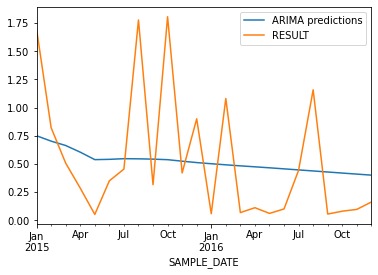

In [64]:
start=len(train)
end=len(train)+len(test)-1
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
#index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
#pred.index=index_future_dates
pred.plot(legend=True)
test['RESULT'].plot(legend=True)

In [65]:
test['RESULT'].mean()

0.5360842957287811

In [66]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['RESULT']))
print(rmse)

0.5287517975282693
